# Neural Networks

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

## Load dataset

In [3]:
def loadCIFARdataset():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    width, height = (x_train.shape[1], x_train.shape[2])

    # Reshape dataset to have a single channel, 
    # converting from integers to floats, and  
    # normalizing they range to [0-1]
    x_train = x_train.reshape(x_train.shape[0], 3*width*height).astype('float32') / 255
    x_test = x_test.reshape(x_test.shape[0], 3*width*height).astype('float32') / 255

    # Converting to one-hot encode for the target values
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train, x_test, y_test, width, height)

label_dict = {    
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [4]:
x_train, y_train, x_test, y_test, width, height = loadCIFARdataset()

Text(0.5, 1.0, 'truck')

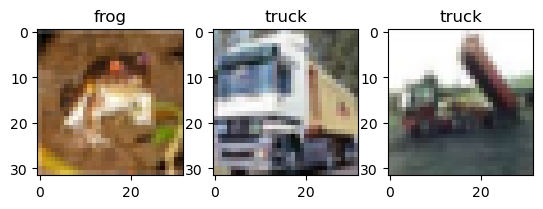

In [5]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(x_train[0, :3*width*height].reshape(width, height, 3))
ax[0].set_title(label_dict[np.argmax(y_train[0, :])])
ax[1].imshow(x_train[1, :3*width*height].reshape(width, height, 3))
ax[1].set_title(label_dict[np.argmax(y_train[1, :])])
ax[2].imshow(x_train[2, :3*width*height].reshape(width, height, 3))
ax[2].set_title(label_dict[np.argmax(y_train[2, :])])

## Defining the model

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation="relu", input_shape=(3*width*height, )))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Train Model

In [7]:
nEpochs = 100
lrUpdate = 80
batchSize = 32

NValid = int(0.1*x_train.shape[0])
x_valid, y_valid = x_train[:NValid, :], y_train[:NValid, :]
x_train, y_train = x_train[NValid:, :], y_train[NValid:, :]

In [8]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
def plotTrainingHistory(history):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='gray', label='test')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='orange', label='train')
    plt.plot(history.history['val_accuracy'], color='gray', label='test')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Epoch 1/80
1407/1407 [==============================] - 10s 5ms/step - loss: 2.0414 - accuracy: 0.2435 - val_loss: 1.8689 - val_accuracy: 0.3260
Epoch 2/80
1407/1407 [==============================] - 8s 5ms/step - loss: 1.8399 - accuracy: 0.3362 - val_loss: 1.8231 - val_accuracy: 0.3344
Epoch 3/80
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7601 - accuracy: 0.3685 - val_loss: 1.8573 - val_accuracy: 0.3350
Epoch 4/80
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7094 - accuracy: 0.3890 - val_loss: 1.6984 - val_accuracy: 0.3844
Epoch 5/80
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6675 - accuracy: 0.4041 - val_loss: 2.1122 - val_accuracy: 0.2924
Epoch 6/80
1407/1407 [==============================] - 23s 16ms/step - loss: 1.6332 - accuracy: 0.4187 - val_loss: 1.5863 - val_accuracy: 0.4338
Epoch 7/80
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6022 - accuracy: 0.4297 - val_loss: 1.6270 - val_accur

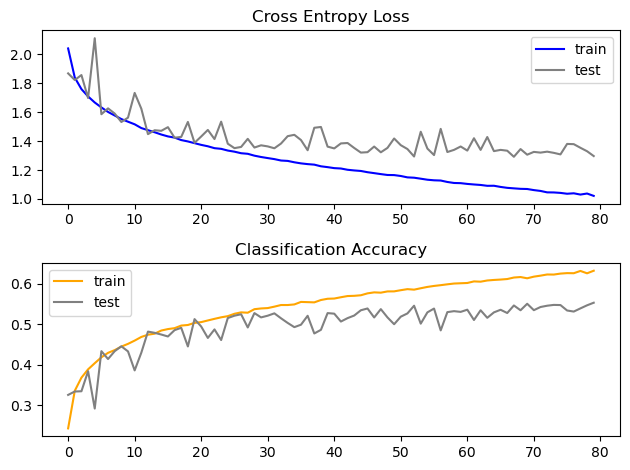

Epoch 81/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9321 - accuracy: 0.6657 - val_loss: 1.2612 - val_accuracy: 0.5670
Epoch 82/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9217 - accuracy: 0.6676 - val_loss: 1.2617 - val_accuracy: 0.5698
Epoch 83/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.9245 - accuracy: 0.6685 - val_loss: 1.2597 - val_accuracy: 0.5700
Epoch 84/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9172 - accuracy: 0.6713 - val_loss: 1.2652 - val_accuracy: 0.5672
Epoch 85/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9160 - accuracy: 0.6716 - val_loss: 1.2654 - val_accuracy: 0.5660
Epoch 86/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9133 - accuracy: 0.6710 - val_loss: 1.2594 - val_accuracy: 0.5696
Epoch 87/100
1407/1407 [==============================] - 8s 6ms/step - loss: 0.9122 - accuracy: 0.6704 - val_loss: 1.2645 -

In [10]:
history = model.fit(x_train, y_train, epochs=lrUpdate, batch_size=batchSize,
                    validation_data=[x_valid, y_valid])

plotTrainingHistory(history=history)

optimizer.learning_rate.assign(0.001)

history = model.fit(x_train, y_train, initial_epoch=lrUpdate, epochs=nEpochs, batch_size=batchSize,
                    validation_data=[x_valid, y_valid])

## Test the model

In [11]:
def showErrors(model, x_test, y_test, width, height):
    y_hat = np.argmax(model.predict(x_test), axis=-1)
    y_test_array = y_test.argmax(1)
    test_wrong = [im for im in zip(x_test,y_hat,y_test_array) if im[1] != im[2]]
    accuracy = 1 - len(test_wrong)/x_test.shape[0]
    plt.figure(figsize=(15, 15))
    plt.suptitle(f"accuracy = {accuracy:.3f}")
    for ind, val in enumerate(test_wrong[:20]):
        plt.subplot(10, 10, ind + 1)

        predictLabel = label_dict[val[1]]
        correctLabel = label_dict[val[2]]

        im = val[0].reshape((width,height,3))
        plt.axis("off")
        plt.text(0, -0.5, correctLabel, fontsize=14, color='green') # correct
        plt.text(0, -5.0, predictLabel, fontsize=14, color='red')  # predicted

        plt.imshow(im, cmap='gray')
    plt.tight_layout()
    plt.show()

313/313 [==============================] - 21s 14ms/step


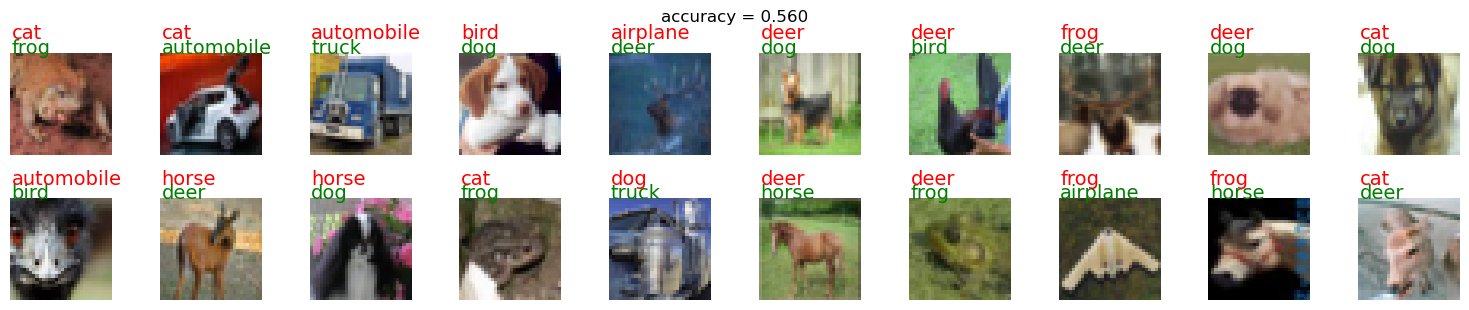

In [12]:
showErrors(model, x_test, y_test, width, height)